# Lab 8 : Star Formation 

In [2]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [3]:
def StarFormationRate(L, Type, TIR=0):
    """ 
    This function computes the star formation rate of a galaxy
    following Kennicutt & Evans 2012 Eqn 12 (ARA&A 50)
    
    INPUTS
    ------
        L: `float`
            Luminosity of the galaxy in a given waveband (erg/s)
        Type: `str`
            Wavelength: `FUV`, `NUV`, `TIR`, `Halpha`
        TIR: `float`
            Total infrared luminosity (erg/s) -- default is 0
            
    OUTPUTS
    -------
        SFR: `float`
            Log of the star formation rate (Msun/yr)
    """
    
    if Type == 'FUV':
        logCx = 43.35 # Calibration from table 1 (K&E 2012)
        TIRc = 0.46 # Correction for dust absorption from table 2 (K&E 12)
    elif Type == 'NUV':
        logCx = 43.17
        TIRc = 0.27
    elif Type == 'Halpha':
        logCx = 41.27
        TIRc = 0.0024
    elif Type == 'TIR':
        logCx = 43.41
        TIRc = 0
    else:
        print("Missing Wavelength: 'FUV', 'NUV', 'TIR', 'Halpha'")
        
    # Correct the luminosity for dust using TIR
    Lnew = L + TIRc*TIR
    
    # Star formation rate
    SFR = np.log10(Lnew) - logCx
    
    return SFR

In [4]:
LsunErgS = const.L_sun.to(u.erg/u.s).value

In [5]:
#  WLM Dwarf Irregular Galaxy
# From NED : WLM NUV Luminosity 1.7e7 Lsun
# From NED : WIL NIR Luminosity 2.48e6 Lsun
# From NED : WLM FIR Luminosity 7.84e5 Lsun

NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = 2.48e6*LsunErgS + 7.84e5*LsunErgS

print(StarFormationRate(NUV_WLM, 'NUV', TIR_WLM))

-2.3322074670824904


In [6]:
#  N24 Sc galaxy


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [7]:
def SFRMainSequence(Mstar, z):
    """
    This function computes the average SFR of a galaxy
    as a function of stellar mass.
    
    INPUTS
    ------
        Mstar: `float`
            Stelar mass of the galaxy in Msun
        z: `float`
            redshift
    
    OUTPUTS
    -------
        logSFR: `float`
            log( SFR (Msun/yr))
    """
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    
    logSFR = alpha*(np.log10(Mstar) -10.5) + beta
    
    return logSFR

# Step 2

In [8]:
# MW at z=0

MW_disk = 8e10

print(10**SFRMainSequence(MW_disk, 0))

4.5937038237959715


In [9]:
# MW at z = 1

MW_disk = 8e10

print(10**SFRMainSequence(MW_disk, 1))

36.287854588142594


# Step 3

In [10]:
# create an array of stellar masses
Mass = np.linspace(1e9,1e12)

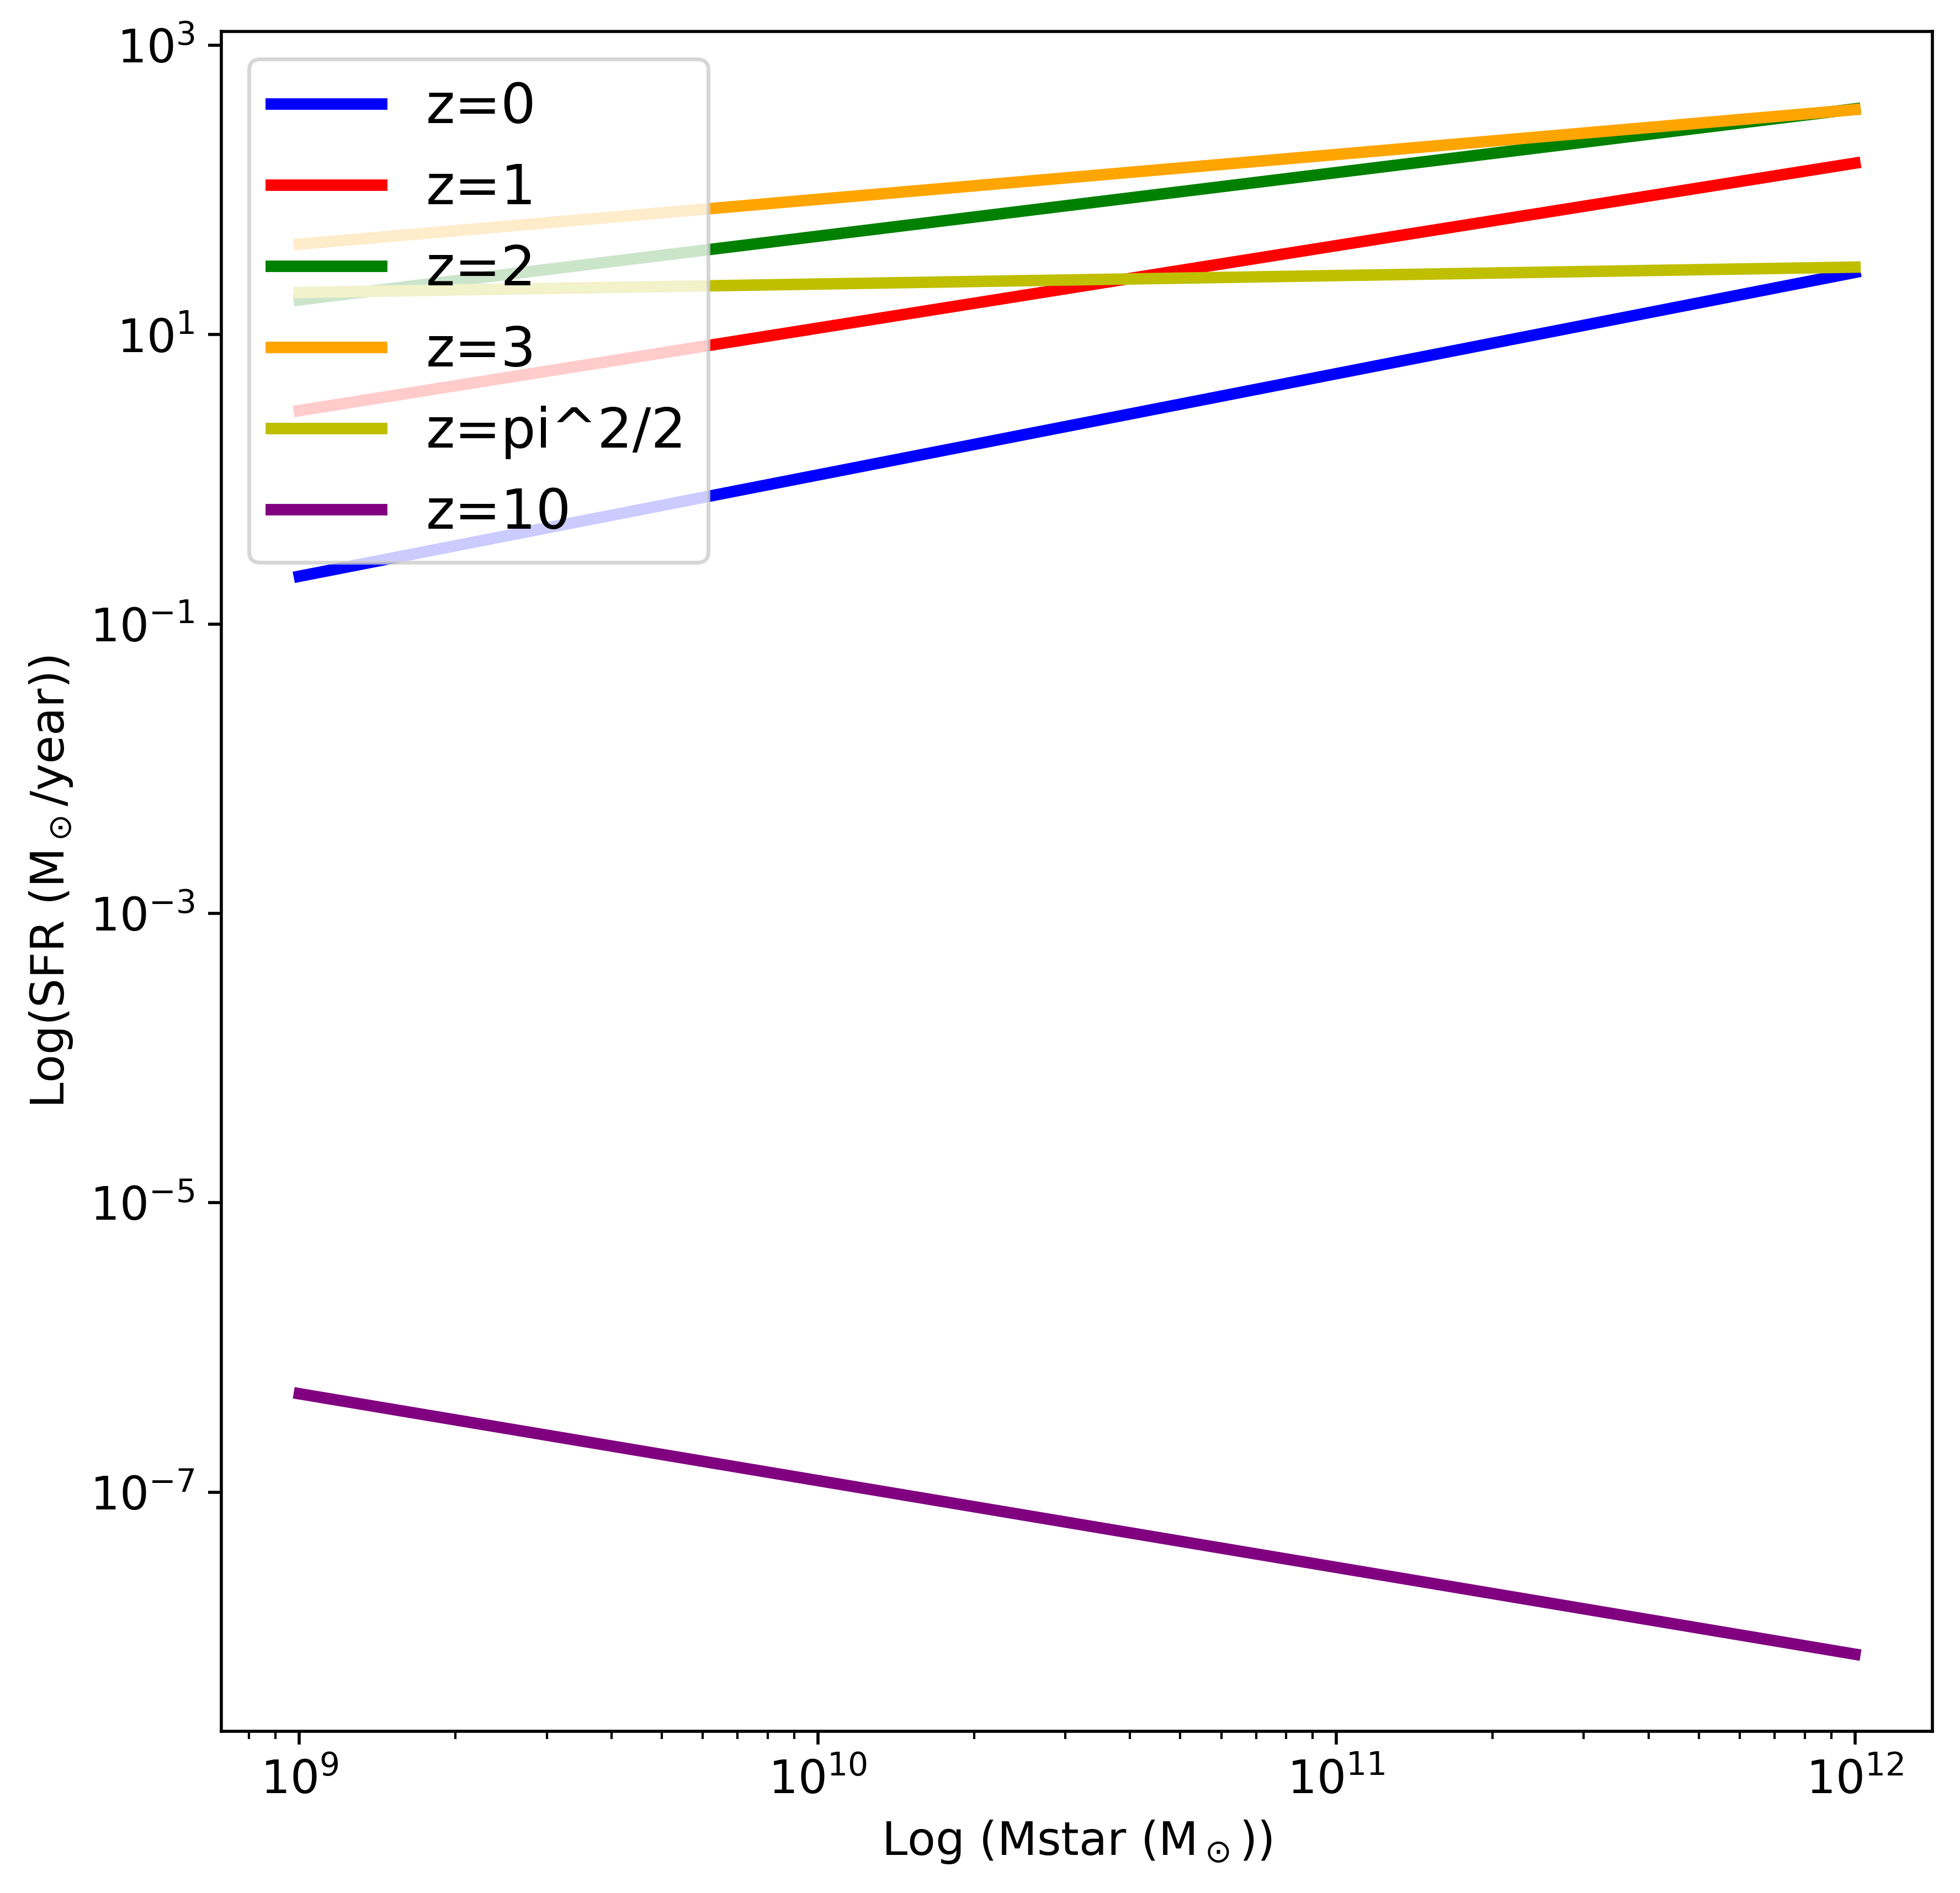

In [16]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass, 0), color='b', linewidth=3, label='z=0')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 1), color='r', linewidth=3, label='z=1')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 2), color='g', linewidth=3, label='z=2')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 3), color='orange', linewidth=3, label='z=3')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 5), color='y', linewidth=3, label='z=5')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 10), color='purple', linewidth=3, label='z=10')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [17]:
# normal galaxies 

TIR_Normal = 1e10*LsunErgS

print(10**StarFormationRate(TIR_Normal, 'TIR'))

1.4892648150381245


In [18]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS

print(10**StarFormationRate(TIR_LIRG, 'TIR'))

14.892648150381245


In [19]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS

print(10**StarFormationRate(TIR_ULIRG, 'TIR'))

148.92648150381245


In [20]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS

print(10**StarFormationRate(TIR_HLIRG, 'TIR'))

1489.2648150381244
